# Flight Delay Prediction 

Importing Libraries

In [1]:
from sys import stdin
import numpy as np # linear algebra
from numpy import exp,array,random,dot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

/Users/halhamdan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Load the data

In [3]:
Data = pd.read_csv("Data/FlightDelay with Weather.csv")

print("The number of rows in the data set is {}.".format(len(Data)))
print("The number of features is {}.".format(len(Data.columns)))

Data.head()

The number of rows in the data set is 11435.
The number of features is 26.


AIRLINE_ID  DAY_OF_MONTH  DAY_OF_WEEK  DELAY  DEST_AIRPORT_ID  FL_NUM  \
0       19805             2            1    0.0            10397    2661   
1       19805             2            1    0.0            10397    2661   
2       19805             2            1    0.0            10397    2661   
3       19805             2            1    0.0            10397    2661   
4       19805             2            1    0.0            10397    2661   

   MONTH  ORIGIN_AIRPORT_ID  QUARTER  SCHED_ARR_TIME       ...          temp  \
0      1              11298        1            1025       ...        286.22   
1      1              11298        1            1025       ...        286.22   
2      1              11298        1            1025       ...        286.22   
3      1              11298        1            1025       ...        286.22   
4      1              11298        1            1025       ...        286.22   

   temp_ARR  temp_max  temp_max_ARR  temp_min  temp_min_ARR  wind_deg  \
0    283.92    287.15        285.15    285.15        283.15     240.0   
1    283.92    287.15        285.15    285.15        283.15     240.0   
2    283.92    287.15        285.15    285.15        283.15     240.0   
3    283.92    287.15        285.15    285.15        283.15     240.0   
4    283.92    287.15        285.15    285.15        283.15     240.0   

   wind_deg_ARR  wind_speed  wind_speed_ARR  
0         100.0         2.0             2.0  
1         100.0         2.0             2.0  
2         100.0         2.0             2.0  
3         100.0         2.0             2.0  
4         100.0         2.0             2.0  

[5 rows x 26 columns]

# DATA PREPROCESSING :

Step1: Removing Null Values:

In [4]:
# Finding Null Values
Data.isnull().sum()

AIRLINE_ID              0
DAY_OF_MONTH            0
DAY_OF_WEEK             0
DELAY                 172
DEST_AIRPORT_ID         0
FL_NUM                  0
MONTH                   0
ORIGIN_AIRPORT_ID       0
QUARTER                 0
SCHED_ARR_TIME          0
SCHED_DEP_TIME          0
YEAR                    0
humidity             6790
humidity_ARR          848
pressure             6790
pressure_ARR          848
temp                 6790
temp_ARR              848
temp_max             6790
temp_max_ARR          848
temp_min             6790
temp_min_ARR          848
wind_deg             6790
wind_deg_ARR          848
wind_speed           6790
wind_speed_ARR        848
dtype: int64

In [5]:
# Delete the rows containing missing data
NoNull_Data = Data.dropna(axis=0)
# Check to make sure there are no more NaNs
NoNull_Data.isnull().sum() 

AIRLINE_ID           0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
DELAY                0
DEST_AIRPORT_ID      0
FL_NUM               0
MONTH                0
ORIGIN_AIRPORT_ID    0
QUARTER              0
SCHED_ARR_TIME       0
SCHED_DEP_TIME       0
YEAR                 0
humidity             0
humidity_ARR         0
pressure             0
pressure_ARR         0
temp                 0
temp_ARR             0
temp_max             0
temp_max_ARR         0
temp_min             0
temp_min_ARR         0
wind_deg             0
wind_deg_ARR         0
wind_speed           0
wind_speed_ARR       0
dtype: int64

In [6]:
print("The number of rows in the new data set is {}.".format(len(NoNull_Data)))

The number of rows in the new data set is 4357.


Step 2: Normalization

In [7]:
from sklearn import preprocessing

Norm_Colm = ["humidity",
 "humidity_ARR",
 "pressure",
 "pressure_ARR",
 "temp",
 "temp_ARR",
 "temp_max",
 "temp_max_ARR",
 "temp_min",
 "temp_min_ARR",
 "wind_deg",
 "wind_deg_ARR",
 "wind_speed",
 "wind_speed_ARR"]

#Norm_Data = preprocessing.normalize(NoNull_Data[Norm_Colm])
#Rest_Colm = [i for i in NoNull_Data if i not in Norm_Colm]
#UnNorm_Data =  NoNull_Data[Rest_Colm]

NoNull_Data[Norm_Colm] = NoNull_Data[Norm_Colm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

#Result_Data = pd.concat((UnNorm_Data, Norm_Data), axis=1)
NoNull_Data.head()

/Users/halhamdan/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


AIRLINE_ID  DAY_OF_MONTH  DAY_OF_WEEK  DELAY  DEST_AIRPORT_ID  FL_NUM  \
0       19805             2            1    0.0            10397    2661   
1       19805             2            1    0.0            10397    2661   
2       19805             2            1    0.0            10397    2661   
3       19805             2            1    0.0            10397    2661   
4       19805             2            1    0.0            10397    2661   

   MONTH  ORIGIN_AIRPORT_ID  QUARTER  SCHED_ARR_TIME       ...        \
0      1              11298        1            1025       ...         
1      1              11298        1            1025       ...         
2      1              11298        1            1025       ...         
3      1              11298        1            1025       ...         
4      1              11298        1            1025       ...         

       temp  temp_ARR  temp_max  temp_max_ARR  temp_min  temp_min_ARR  \
0  0.558432  0.450805  0.516667      0.392157  0.566038      0.468085   
1  0.558432  0.450805  0.516667      0.392157  0.566038      0.468085   
2  0.558432  0.450805  0.516667      0.392157  0.566038      0.468085   
3  0.558432  0.450805  0.516667      0.392157  0.566038      0.468085   
4  0.558432  0.450805  0.516667      0.392157  0.566038      0.468085   

   wind_deg  wind_deg_ARR  wind_speed  wind_speed_ARR  
0  0.631579      0.277778    0.142857        0.142857  
1  0.631579      0.277778    0.142857        0.142857  
2  0.631579      0.277778    0.142857        0.142857  
3  0.631579      0.277778    0.142857        0.142857  
4  0.631579      0.277778    0.142857        0.142857  

[5 rows x 26 columns]

Step 3 : Converting all categorical variables into dummy variables:

In [8]:
Dummy_Data = pd.get_dummies(NoNull_Data, columns=['AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID'], drop_first=True)
Dummy_Data.head()

DAY_OF_MONTH  DAY_OF_WEEK  DELAY  FL_NUM  MONTH  QUARTER  SCHED_ARR_TIME  \
0             2            1    0.0    2661      1        1            1025   
1             2            1    0.0    2661      1        1            1025   
2             2            1    0.0    2661      1        1            1025   
3             2            1    0.0    2661      1        1            1025   
4             2            1    0.0    2661      1        1            1025   

   SCHED_DEP_TIME  YEAR  humidity          ...            AIRLINE_ID_20304  \
0             720  2017  0.864583          ...                           0   
1             720  2017  0.864583          ...                           0   
2             720  2017  0.864583          ...                           0   
3             720  2017  0.864583          ...                           0   
4             720  2017  0.864583          ...                           0   

   AIRLINE_ID_20416  AIRLINE_ID_21171  ORIGIN_AIRPORT_ID_11298  \
0                 0                 0                        1   
1                 0                 0                        1   
2                 0                 0                        1   
3                 0                 0                        1   
4                 0                 0                        1   

   ORIGIN_AIRPORT_ID_12892  ORIGIN_AIRPORT_ID_13930  ORIGIN_AIRPORT_ID_14771  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   DEST_AIRPORT_ID_11298  DEST_AIRPORT_ID_12892  DEST_AIRPORT_ID_14771  
0                      0                      0                      0  
1                      0                      0                      0  
2                      0                      0                      0  
3                      0                      0                      0  
4                      0                      0                      0  

[5 rows x 36 columns]

Step 4: Setting X and Y :

In [9]:
Data_Final_Vars=Dummy_Data.columns.values.tolist()
y=['DELAY']
X=[i for i in Data_Final_Vars if i not in y]

# Feature Selection

In [10]:
Dummy_Data.columns.values
X

['DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'FL_NUM',
 'MONTH',
 'QUARTER',
 'SCHED_ARR_TIME',
 'SCHED_DEP_TIME',
 'YEAR',
 'humidity',
 'humidity_ARR',
 'pressure',
 'pressure_ARR',
 'temp',
 'temp_ARR',
 'temp_max',
 'temp_max_ARR',
 'temp_min',
 'temp_min_ARR',
 'wind_deg',
 'wind_deg_ARR',
 'wind_speed',
 'wind_speed_ARR',
 'AIRLINE_ID_19790',
 'AIRLINE_ID_19805',
 'AIRLINE_ID_19977',
 'AIRLINE_ID_20304',
 'AIRLINE_ID_20416',
 'AIRLINE_ID_21171',
 'ORIGIN_AIRPORT_ID_11298',
 'ORIGIN_AIRPORT_ID_12892',
 'ORIGIN_AIRPORT_ID_13930',
 'ORIGIN_AIRPORT_ID_14771',
 'DEST_AIRPORT_ID_11298',
 'DEST_AIRPORT_ID_12892',
 'DEST_AIRPORT_ID_14771']

In [11]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(Dummy_Data[X], Dummy_Data[y] )

print(rfe.support_)
print(rfe.ranking_)

/Users/halhamdan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False False False  True  True  True  True
  True False False  True  True  True False  True  True  True  True False
  True  True  True  True  True False  True False  True False  True]
[12  9 16  5  4 15 14 13  1  1  1  1  1  6  2  1  1  1  7  1  1  1  1 10  1
  1  1  1  1  8  1  3  1 11  1]


The Recursive Feature Elimination (RFE) has helped us select the following features:

In [12]:
cols=["YEAR", "QUARTER", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "SCHED_ARR_TIME", "AIRLINE_ID_19790", 
      "AIRLINE_ID_19805", "AIRLINE_ID_20304", "AIRLINE_ID_21171", "ORIGIN_AIRPORT_ID_11298", "ORIGIN_AIRPORT_ID_12892",
      "ORIGIN_AIRPORT_ID_14771","ORIGIN_AIRPORT_ID_13930", "DEST_AIRPORT_ID_14771", "DEST_AIRPORT_ID_12892",
      "temp","pressure","humidity","wind_speed",
      "temp_ARR", "pressure_ARR","humidity_ARR", "wind_speed_ARR"] 
x = Dummy_Data[cols]
y = Dummy_Data['DELAY']

In [13]:
import statsmodels.api as sm

logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

/Users/halhamdan/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.567572
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  DELAY   No. Observations:                 4357
Model:                          Logit   Df Residuals:                     4333
Method:                           MLE   Df Model:                           23
Date:                Wed, 28 Mar 2018   Pseudo R-squ.:                 0.06755
Time:                        15:35:18   Log-Likelihood:                -2472.9
converged:                       True   LL-Null:                       -2652.1
                                        LLR p-value:                 6.384e-62
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
YEAR                       -0.0010      0.000     -2.751      0.006      -0.002   

# Spilliting the data into training and testing :

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3049, 24)
(1308, 24)
(3049,)
(1308,)


# MODELING

# 1) Logistic Regression:

Building the Model:

In [15]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Cross Validation:

In [16]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.710


Testing the Model:

In [17]:
y_pred = logreg.predict(x_test)

Summary of the predictions made by the classifier:

In [18]:
# Confusion Matrix:
print("The Confusing Matrix:")
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

The Confusing Matrix:
[[855  46]
 [359  48]]


In [19]:
# Accuracy Score:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


In [20]:
# Classification Report:
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

             precision    recall  f1-score   support

    class 0       0.70      0.95      0.81       901
    class 1       0.51      0.12      0.19       407

avg / total       0.64      0.69      0.62      1308



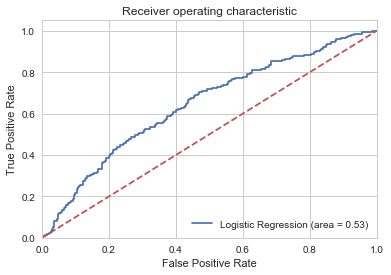

In [21]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Images/Log_ROC')
plt.show()

# 2) Artificial Neural Network:

Building the Model:

In [22]:
class NeuralNetwork():
    def __init__(self):
        # seed the random number generator, so it generates the same 
        random.seed(1)
        
        # We Model a single neuron, with 18 input and one output connection
        self.synaptic_weights = 2 * random.random((24,1)) -1
        
    # The sigmod function, which take the wieghted sum and normalized it between 0 and 1    
    def __sigmoid(self,x):
        return 1/(1 + exp(-x))
    
    # The dervative of the sigmoid function, it indicates how confident we are about the wieght
    def __sigmoid_derivative(self,x):
        return x*(1-x)
    
    # we train the neural network through a process of trail and error.
    # Adjasting the synaptic weights each time.
    def train(self,training_set_inputs, training_set_outputs,number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            #Pass the training set through our neural network (a single neuran).
            output = self.think(training_set_inputs)
     
            #Calculate the error (The diffrence between the desired output and the predicted output )
            error = training_set_outputs - output
           
            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less Confident weight are adjusted more.
            # This means inputs,which are zero, do not cause changes to the weights.
            Adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))
            
            #Adjust the weights.
            self.synaptic_weights += Adjustment
            
    #The neural network thinks.
    def think(self,inputs):
        # Pass inputs through our neural network (our single neuron).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))
            
            
if __name__ == "__main__":
    
    #I ntialise a single neuron neural network.
    neural_network = NeuralNetwork()
    
    print("Random starting synaptic weights: ")
    print(neural_network.synaptic_weights)

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]
 [-0.39533485]
 [-0.70648822]
 [-0.81532281]
 [-0.62747958]
 [-0.30887855]
 [-0.20646505]
 [ 0.07763347]
 [-0.16161097]
 [ 0.370439  ]
 [-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]
 [-0.1653904 ]
 [ 0.11737966]
 [-0.71922612]
 [-0.60379702]
 [ 0.60148914]
 [ 0.93652315]
 [-0.37315164]
 [ 0.38464523]]


Train the Model:

In [23]:
    training_set_inputs = x_train.values.reshape(-1,24)
    training_set_outputs = y_train.values.reshape(-1,1)

   
    # Train the neural network using a training set
    # Do it 10,000 time and make small adjusments each time.
    neural_network.train(training_set_inputs, training_set_outputs, 10000)
    print("New synaptic wieghts after training:")
    print(neural_network.synaptic_weights)

/Users/halhamdan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


New synaptic wieghts after training:
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]
 [-0.39533485]
 [-0.70648822]
 [-0.81532281]
 [-0.62747958]
 [-0.30887855]
 [-0.20646505]
 [ 0.07763347]
 [-0.16161097]
 [ 0.370439  ]
 [-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]
 [-0.1653904 ]
 [ 0.11737966]
 [-0.71922612]
 [-0.60379702]
 [ 0.60148914]
 [ 0.93652315]
 [-0.37315164]
 [ 0.38464523]]


Cross Validation:

In [103]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = neural_network.train(training_set_inputs, training_set_outputs, 10000)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

/Users/halhamdan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


TypeError: estimator should be an estimator implementing 'fit' method, None was passed

Testing the Model:

In [24]:
# Test the neural network with a new set
y_pred = neural_network.think(x_test)

/Users/halhamdan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


Summary of the predictions made by the classifier:

In [25]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix:
print("The Confusing Matrix:")
print(confusion_matrix(y_test, y_pred))

The Confusing Matrix:
[[901   0]
 [407   0]]


In [26]:
# Accuracy score
print('The accuracy of ANN in the testing set is',accuracy_score(y_pred,y_test))

The accuracy of ANN in the testing set is 0.688837920489


In [27]:
# Classfication Report:
print(classification_report(y_test, y_pred,target_names=['class 0', 'Class 1']))     

             precision    recall  f1-score   support

    class 0       0.69      1.00      0.82       901
    Class 1       0.00      0.00      0.00       407

avg / total       0.47      0.69      0.56      1308



/Users/halhamdan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ROC:

/Users/halhamdan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


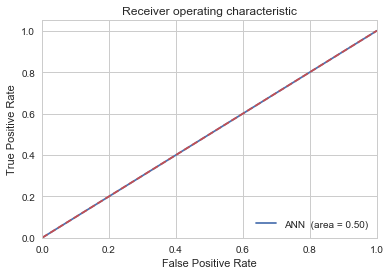

In [28]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


ANN_roc_auc = roc_auc_score(y_test, neural_network.think(x_test))
fpr, tpr, thresholds = roc_curve(y_test,neural_network.think(x_test))
plt.figure()
plt.plot(fpr, tpr, label='ANN  (area = %0.2f)' % ANN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Images/ANN_ROC')
plt.show()

# 3) K-Nearest Neighbour 

In [29]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

Cross Validation:

In [30]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = KNeighborsClassifier(n_neighbors=8)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.733


Testing the Model:

In [31]:
y_pred = classifier.predict(x_test)

 Summary of the predictions made by the classifier:

In [32]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix:
print("The Confusing Matrix:")
print(confusion_matrix(y_test, y_pred))

The Confusing Matrix:
[[835  66]
 [287 120]]


In [33]:
# Accuracy score
print('The accuracy of K-Nearest in the testing set is',accuracy_score(y_pred,y_test))

The accuracy of K-Nearest in the testing set is 0.730122324159


In [34]:
# Classfication Report:
print(classification_report(y_test, y_pred,target_names=['class 0', 'Class 1']))

             precision    recall  f1-score   support

    class 0       0.74      0.93      0.83       901
    Class 1       0.65      0.29      0.40       407

avg / total       0.71      0.73      0.69      1308



ROC:

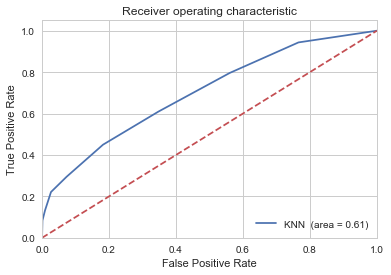

In [35]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


KNN_roc_auc = roc_auc_score(y_test, classifier.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN  (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Images/KNN_ROC')
plt.show()

# 4) RANDOM FOREST CLASSIFIER

Building the Model:

In [36]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 1000, criterion='gini', min_samples_leaf = 50, max_features='auto', oob_score=True, n_jobs=-1, random_state=50)
calssifier = classifier.fit(x_train,y_train)

Cross Validation:

In [37]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = calssifier
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.740


Testing the Model:

In [38]:
predictions = calssifier.predict(x_test)

Summary of the predictions made by the classifier:

In [39]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix:
print("The Confusing Matrix:")
print(confusion_matrix(y_test,predictions ))

The Confusing Matrix:
[[889  12]
 [351  56]]


In [40]:
# Accuracy score
print('The accuracy of Random Forest in the testing set is',accuracy_score(predictions,y_test))

The accuracy of Random Forest in the testing set is 0.72247706422


In [41]:
# Classfication Report:
print(classification_report(y_test, predictions,target_names=['class 0', 'Class 1']))

             precision    recall  f1-score   support

    class 0       0.72      0.99      0.83       901
    Class 1       0.82      0.14      0.24       407

avg / total       0.75      0.72      0.65      1308



ROC:

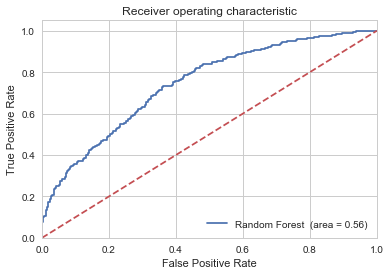

In [42]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


KNN_roc_auc = roc_auc_score(y_test, classifier.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest  (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Images/RF_ROC')
plt.show()